In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [2]:
car = pd.read_csv("car data.csv")
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
car["Car_Name"].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [5]:
car["Car_Name"].nunique()

98

In [6]:
car["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [7]:
car["Seller_Type"].unique()

array(['Dealer', 'Individual'], dtype=object)

In [8]:
car["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [9]:
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
car.drop(["Car_Name"],axis=1,inplace=True)
car.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
car["Current_Year"]=2021
car.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [12]:
car["old"]=car["Current_Year"]-car["Year"]
car.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [13]:
car.drop(["Year","Current_Year"],axis=1,inplace=True)
car.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [14]:
scale=MinMaxScaler()
car["Kms_Driven"]=scale.fit_transform(car[["Kms_Driven"]])
car.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,old
0,3.35,5.59,0.053053,Petrol,Dealer,Manual,0,7
1,4.75,9.54,0.085085,Diesel,Dealer,Manual,0,8
2,7.25,9.85,0.012813,Petrol,Dealer,Manual,0,4
3,2.85,4.15,0.009409,Petrol,Dealer,Manual,0,10
4,4.60,6.87,0.083984,Diesel,Dealer,Manual,0,7


In [15]:
car=pd.get_dummies(car,drop_first=True)
car.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,0.053053,0,7,0,1,0,1
1,4.75,9.54,0.085085,0,8,1,0,0,1
2,7.25,9.85,0.012813,0,4,0,1,0,1
3,2.85,4.15,0.009409,0,10,0,1,0,1
4,4.60,6.87,0.083984,0,7,1,0,0,1


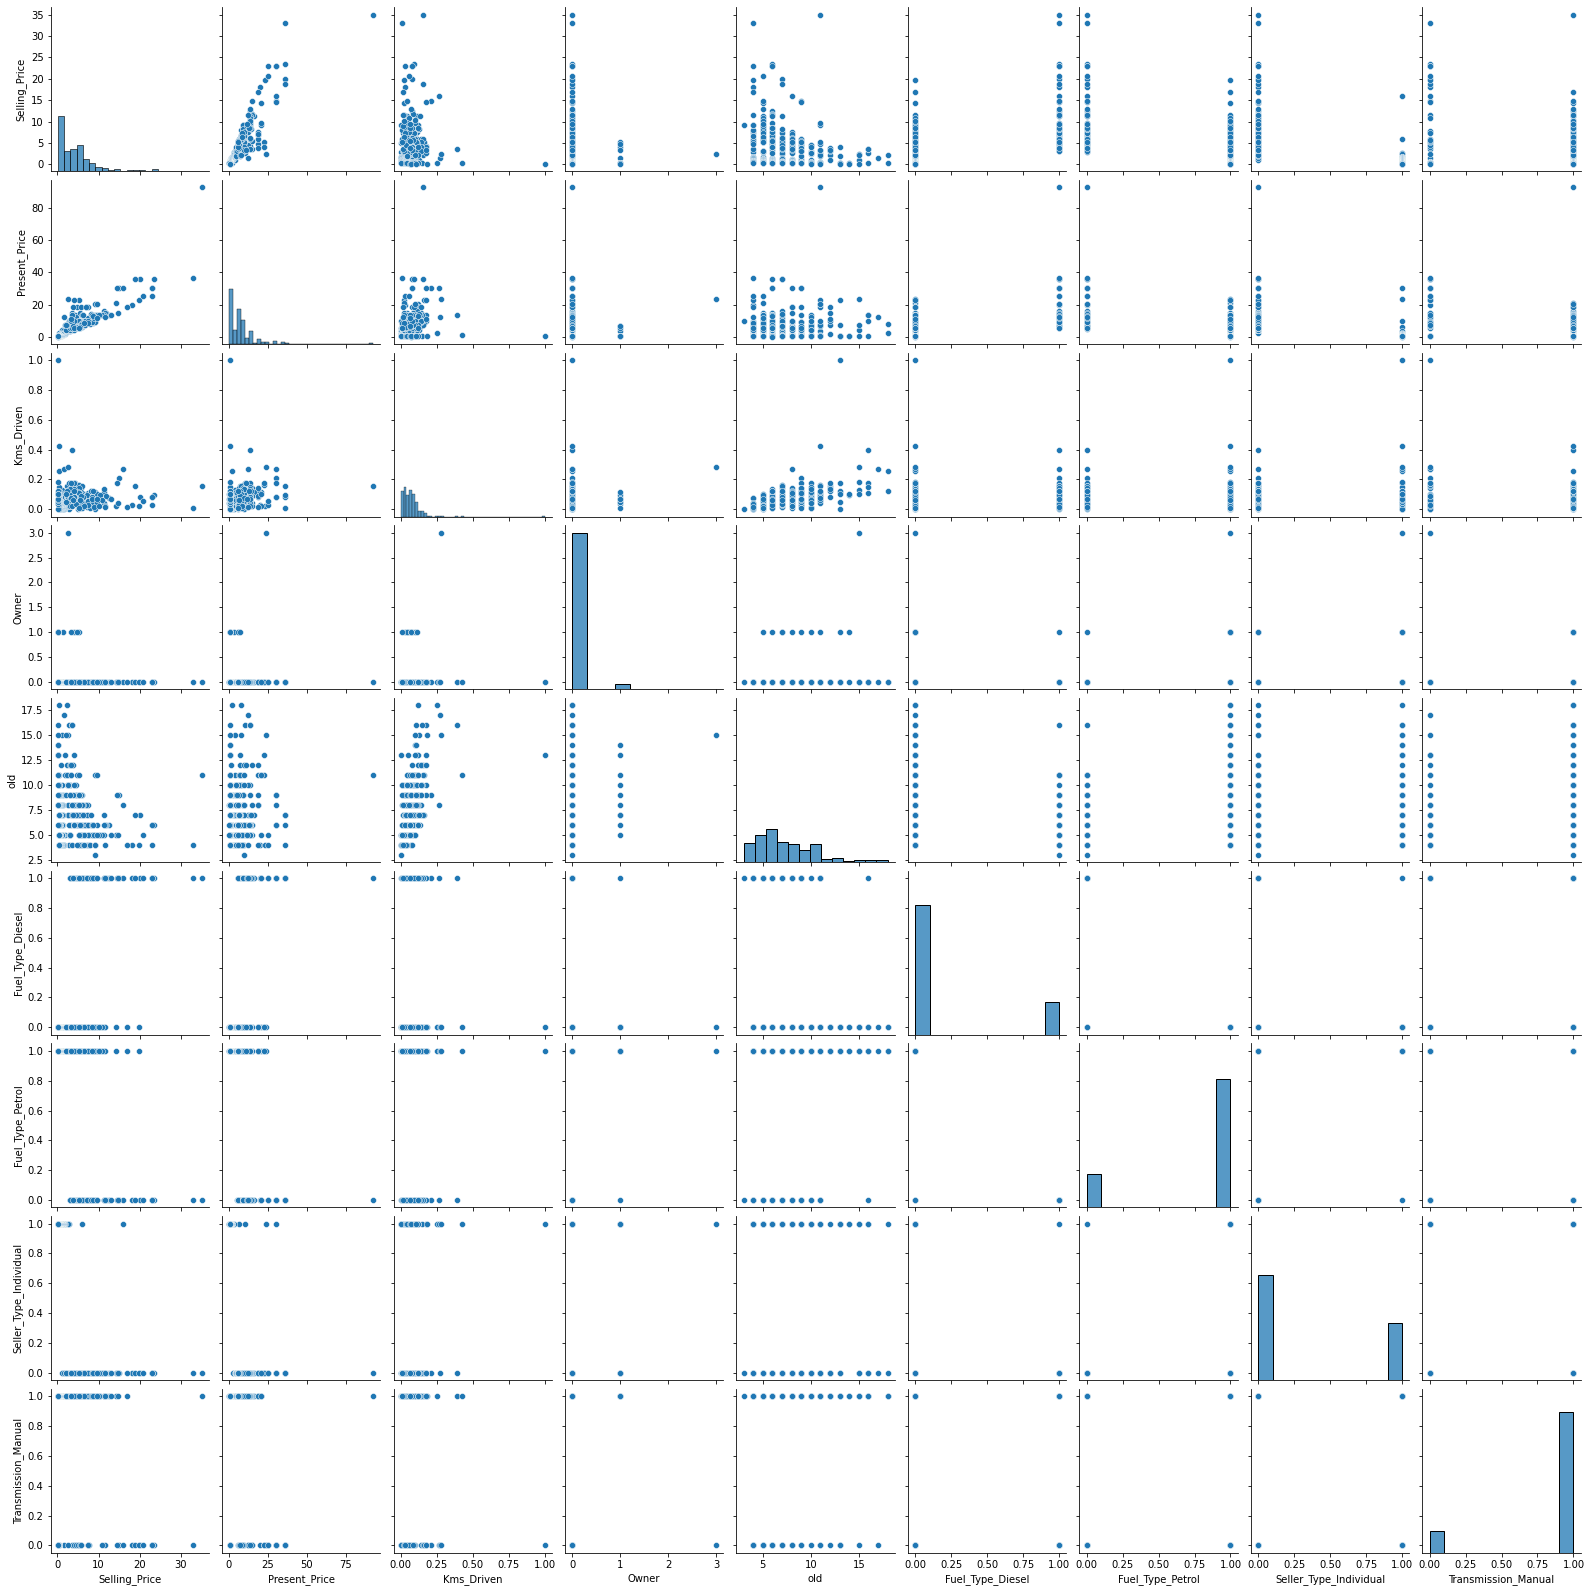

In [16]:
sns.pairplot(car)

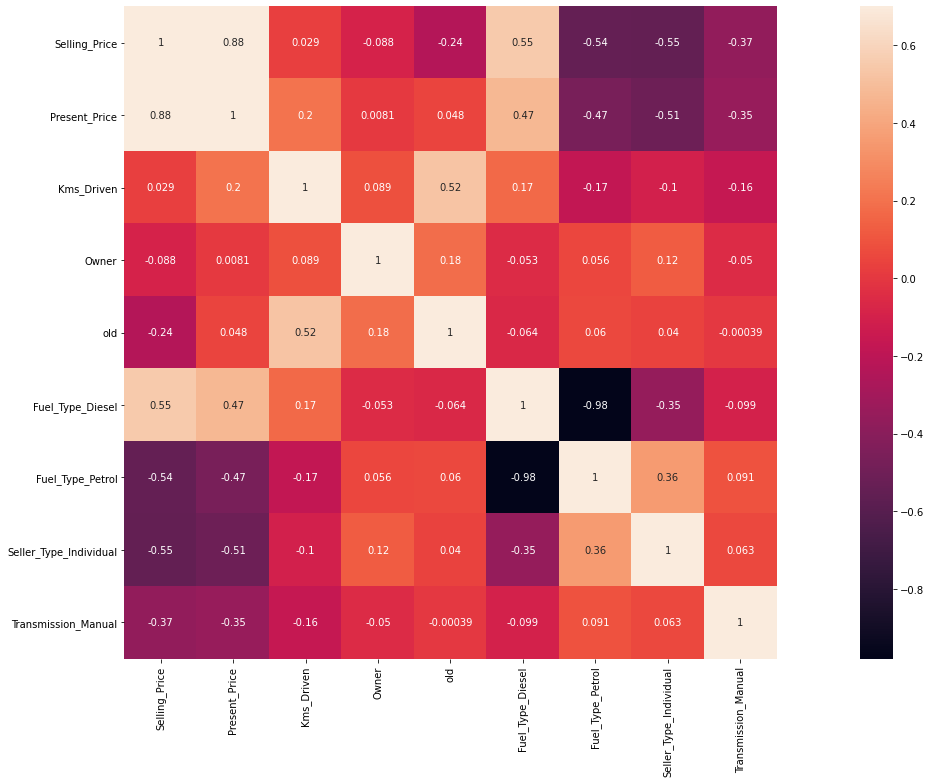

In [17]:
plt.figure(figsize=(30,12))
sns.heatmap(car.corr(),vmax=0.7,square=True,annot=True)
plt.show()

In [18]:
car.drop(["Fuel_Type_Diesel"],axis=1,inplace=True)
car.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,old,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,0.053053,0,7,1,0,1
1,4.75,9.54,0.085085,0,8,0,0,1
2,7.25,9.85,0.012813,0,4,1,0,1
3,2.85,4.15,0.009409,0,10,1,0,1
4,4.60,6.87,0.083984,0,7,0,0,1


In [19]:
X=car.iloc[:,1:]
Y=car.iloc[:,0]
X.head()

,Present_Price,Kms_Driven,Owner,old,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,0.053053,0,7,1,0,1
1,9.54,0.085085,0,8,0,0,1
2,9.85,0.012813,0,4,1,0,1
3,4.15,0.009409,0,10,1,0,1
4,6.87,0.083984,0,7,0,0,1


In [20]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [22]:
model1=LinearRegression()
model1.fit(X_train,Y_train)
Y_predict1=model1.predict(X_test)
print(r2_score(Y_test,Y_predict1))

0.8435743019973134


In [23]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_test,Y_predict1,squared=False))

2.25359552775532


In [24]:
Y_predict1

array([ 7.80044003e+00,  7.94851685e-01,  1.86707765e+00,  2.05709769e+00,
        5.25428765e+00,  6.68156108e+00,  1.96465562e+01, -3.35833940e+00,
        1.01605584e+00,  4.40539882e+00,  4.49311827e-02,  8.73245549e+00,
        4.35905655e+00, -9.51619105e-01,  5.75729872e+00,  3.36830548e+00,
        4.48928975e+00, -7.13362983e+00,  2.62159206e+00,  5.82932950e+00,
        2.02772149e+00,  3.27897625e+00,  7.18106169e+00,  2.13735551e+01,
       -1.21208919e+00,  1.04967079e+00, -1.28255911e+00, -2.67043181e+00,
        1.53504281e+00, -3.39451119e+00, -2.65324028e-01,  1.41041373e+01,
        4.57963176e+00,  7.84343611e+00,  1.42795009e-02,  6.54063651e+00,
        2.60436254e+00,  3.56667568e+00,  1.63987798e+00,  4.21198581e+00,
        5.97948464e+00,  3.10452026e-01,  6.38240927e+00,  1.06030030e-02,
        1.04147167e+01,  3.35702983e+00, -8.21786349e-01,  4.84364285e+00,
        8.94784334e+00,  9.13895541e-01, -1.19631324e+00,  6.30493201e+00,
        8.77861644e-01,  

In [25]:
Y_test

258     8.40
154     0.50
227     2.55
126     0.90
268     4.80
       ...  
275    10.90
121     1.05
231     9.25
299    11.50
281     2.10
Name: Selling_Price, Length: 61, dtype: float64

In [26]:
model2=RandomForestRegressor()
model2.fit(X_train,Y_train)
Y_predict2=model2.predict(X_test)
print(r2_score(Y_test,Y_predict2))
print(mean_squared_error(Y_test,Y_predict2,squared=False))

0.92086391699766
1.6029102144966527


In [27]:
model3=DecisionTreeRegressor()
model3.fit(X_train,Y_train)
Y_predict3=model3.predict(X_test)
print(r2_score(Y_test,Y_predict3))
print(mean_squared_error(Y_test,Y_predict3,squared=False))

0.9241391545441253
1.5693895649447198
